In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

┌ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]
└ @ Base loading.jl:1662


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)
;

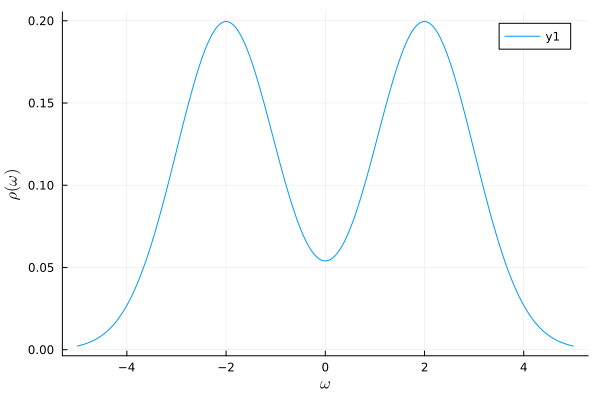

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
#moments = Complex{T}.([1, 0, 5, 0, 43])

15-element Vector{Complex{BigFloat}}:
           1.0 + 0.0im
           0.0 + 0.0im
           5.0 + 0.0im
           0.0 + 0.0im
          43.0 + 0.0im
           0.0 + 0.0im
         499.0 + 0.0im
           0.0 + 0.0im
        7193.0 + 0.0im
           0.0 + 0.0im
      123109.0 + 0.0im
           0.0 + 0.0im
  2.430355e+06 + 0.0im
           0.0 + 0.0im
 5.4229907e+07 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27


In [9]:
#ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

In [10]:
#Nevanlinna.solve!(ham_nev_sol)

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


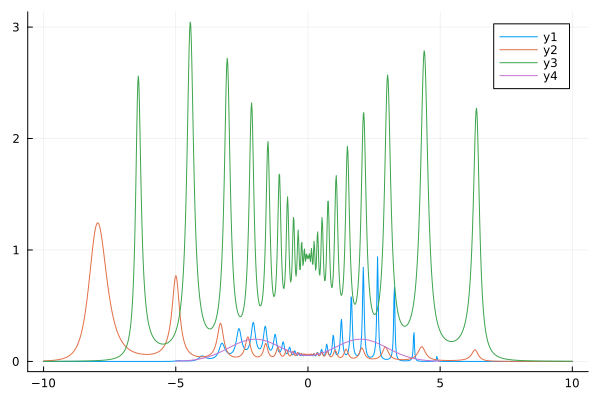

In [14]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.nev_st.reals.val))/pi)
#plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [13]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined